### LORENZ TEST

In [4]:
import importlib
import json
from collections import OrderedDict

import numpy as np
import matplotlib.pyplot as plt

from model import ReservoirModel
import utils
from utils import integration_lorenz


In [2]:
config_path = "lorenz.config"  # FIXME: Maybe use YAML? If you want hard-typed config, use pydantic
with open(config_path) as config_file:
    config = json.load(config_file, object_pairs_hook=OrderedDict)

In [3]:
# Generate data
# TODO: Maybe make a cached data file
data, time = integration_lorenz(
    epoch=config["system"]["length"],
    delta_t=config["system"]["d_t"]
)
print(f"{data.shape=}")

data.shape=(14000, 4)


In [4]:
RP_lorenz = ReservoirModel(config)
loss, loss_before_training = RP_lorenz.training(data)
print(f"{loss_before_training=:.04f}")
print(f"{loss=:.04f}")

/home/bfish/projects/reservoir/model.py:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:89: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(


loss_before_training=165.5856
loss=0.0128


In [5]:
output_lorenz = RP_lorenz.run_by_self(data)
#forced_output_lorenz, _ = RP_lorenz.run_with_input()

/home/bfish/projects/reservoir/model.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  prev_state, torch.tensor(output)


/tmp/ipykernel_159847/3183875475.py:14: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_lorenz),


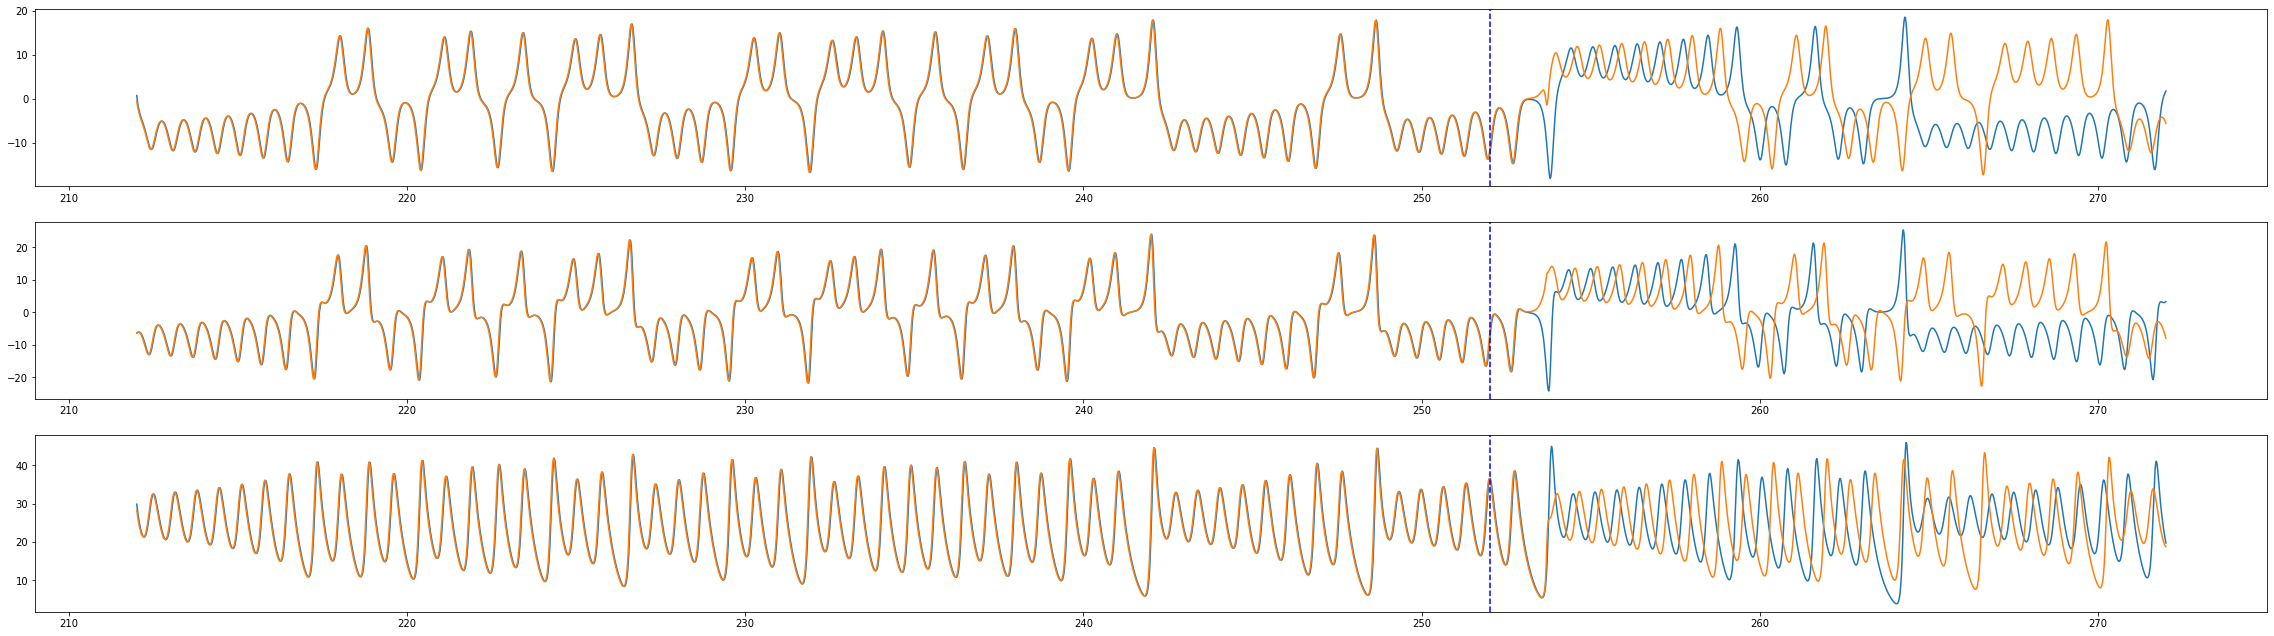

In [7]:
import torch
import numpy as np
import importlib
import utils

importlib.reload(utils)
# utils.plot_time_sequence(RP_lorenz.training_time,RP_lorenz.training_time+1000,RP_lorenz.training_time,RP_lorenz.f,torch.tensor(output_lorenz),torch.tensor(lorenz).T,time,3)
lorenz_time = np.linspace(0, RP_lorenz.run_time * RP_lorenz.d_t, RP_lorenz.run_time)

utils.plot_time_sequence(
    RP_lorenz.training_time - 2000,
    RP_lorenz.training_time + 1000,
    RP_lorenz.training_time,
    torch.tensor(output_lorenz),
    torch.tensor(data),
    lorenz_time,
    3,
)

# import numpy as np
# import matplotlib.pyplot as plt
# fig2=plt.figure()
# fig2.set_figwidth(40)
# fig2.set_figheight(15)

# print(output[0])
# plt.subplot(311)
# plt.plot(time[1000:1200],lorenz_x[1000:1200])
# plt.plot(time[1000:1200],(output.T[0][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[0][1005:1205])
# plt.subplot(312)
# plt.plot(time[1000:1200],lorenz_y[1000:1200])
# plt.plot(time[1000:1200],(output.T[1][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[1][1005:1205])
# plt.subplot(313)
# plt.plot(time[1000:1200],lorenz_z[1000:1200])
# plt.plot(time[1000:1200],(output.T[2][1005-10:1205-10]))
# #plt.plot(time[1000:1200],forced_output.T[2][1005:1205])
# plt.show()

### MACKEY-GLASS TEST

In [5]:

config_path = "mackey_glass.config"
with open(config_path) as config_file:
    config = json.load(config_file, object_pairs_hook=OrderedDict)

In [7]:
# Generate data
# TODO: Maybe make a cached data file
data_mg, time_mg = utils.discrete_mackey_glass(
    epoch=config["system"]["length"],
    delta_t=config["system"]["d_t"]
)
print(f"{data_mg.shape=}")

data_mg.shape=(18000, 1)


In [9]:
importlib.reload(utils)

RP_mg = ReservoirModel(config)
loss, loss_before_training = RP_mg.training(data_mg)
print(f"{loss_before_training=:.04f}")
print(f"{loss=:.04f}")

/home/bfish/projects/reservoir/model.py:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:89: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(


loss_before_training=11.9010
loss=0.0004


In [18]:
output_mg = RP_mg.run_by_self(data_mg)

/home/bfish/projects/reservoir/model.py:93: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  + torch.tensor(feed_to_reservoir)
/home/bfish/projects/reservoir/model.py:90: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(
/home/bfish/projects/reservoir/model.py:89: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  state = torch.tensor(
/home/bfish/projects/reservoir/model.py:123: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rat

/tmp/ipykernel_161241/3181532338.py:12: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(output_mg),


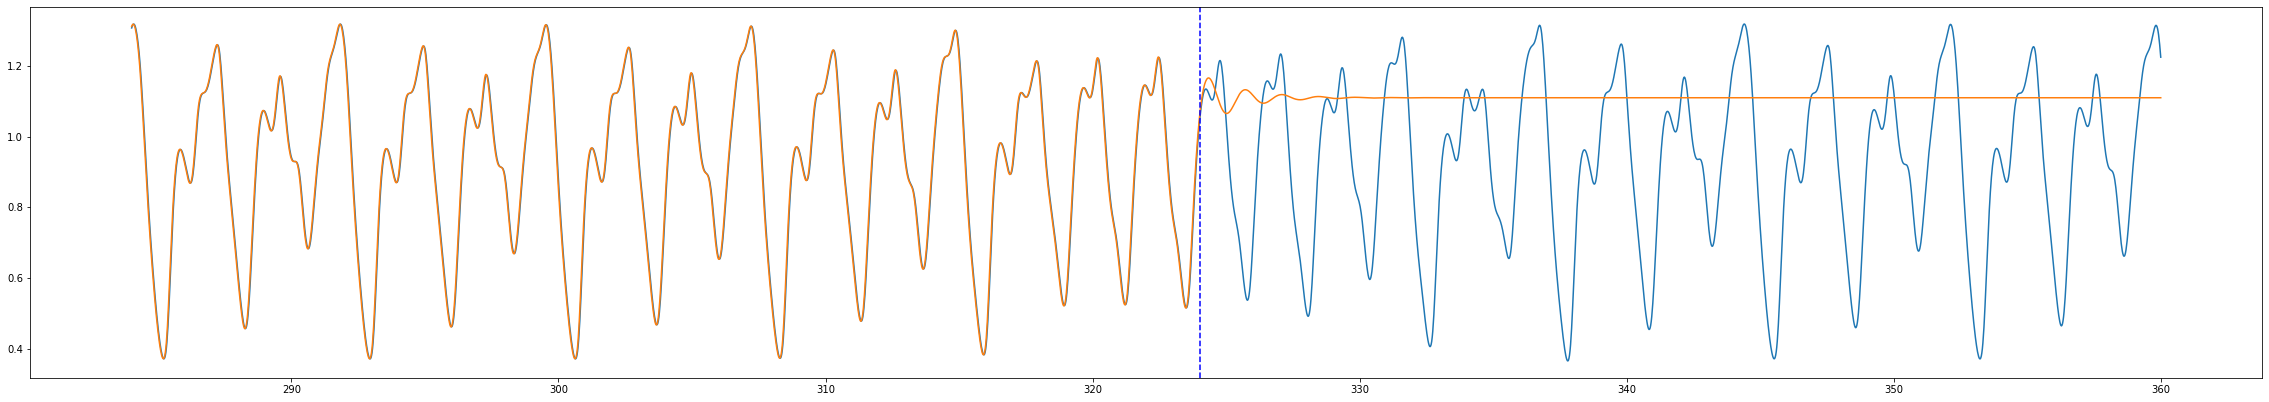

In [20]:
import torch
import numpy as np
import importlib
import utils
mg_time = np.linspace(0, RP_mg.run_time * RP_mg.d_t, RP_mg.run_time)
importlib.reload(utils)
# plot of train-and-auto-run
utils.plot_time_sequence(
    RP_mg.training_time - 2000,
    RP_mg.training_time + 2000,
    RP_mg.training_time,
    torch.tensor(output_mg),
    torch.tensor(data_mg),
    mg_time,
    1,
)



# utils.plot_time_sequence(0,RP.run_time,RP.f,p,s,time,1)